In [1]:
import os
import json
import numpy as np
import clima_anom as ca

import geopandas as gpd

import rasterio
from rasterio.plot import show

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [2]:
lon_min, lon_max, lat_min, lat_max, area = 6.5, 19, 36.5, 48, 'ITALY'

In [3]:
NE_dir = os.path.join('/','media','arturo','T9','Data','shapes','Natural_Earth','NE_10m_LowReso','NE1_LR_LC_SR_W.tif')
naturalearth = rasterio.open(NE_dir)

In [4]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "REGION"})

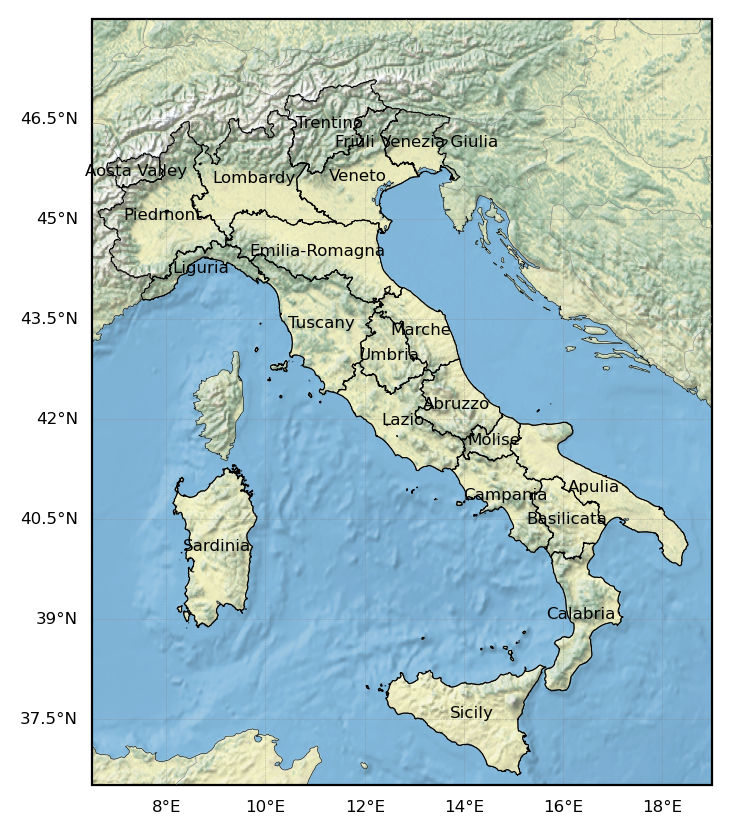

In [5]:
line_rivers = 0.3
linewidth_map = 0.2

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,5),dpi=200)
gs = gridspec.GridSpec(1,1)

# =============================================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_aspect('auto')
ax1.coastlines(linestyle='-',linewidth=linewidth_map,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=linewidth_map,edgecolor='grey',zorder=10)

show(naturalearth, ax=ax1)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.4, zorder=10)

for idx, row in REGIONS.iterrows():
    # Obtener coordenadas del centroide
    lon_c, lat_c = row['geometry'].centroid.xy
    lon_c = lon_c[0]
    lat_c = lat_c[0]
    
    # Agregar el nombre de la región en el mapa
    ax1.text(
        lon_c, lat_c, row['REGION'], 
        fontsize=6, color="black", 
        ha='center', va='center',
        zorder=20
    )

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

Export figure to: ../figures/Article_down/figure1.png


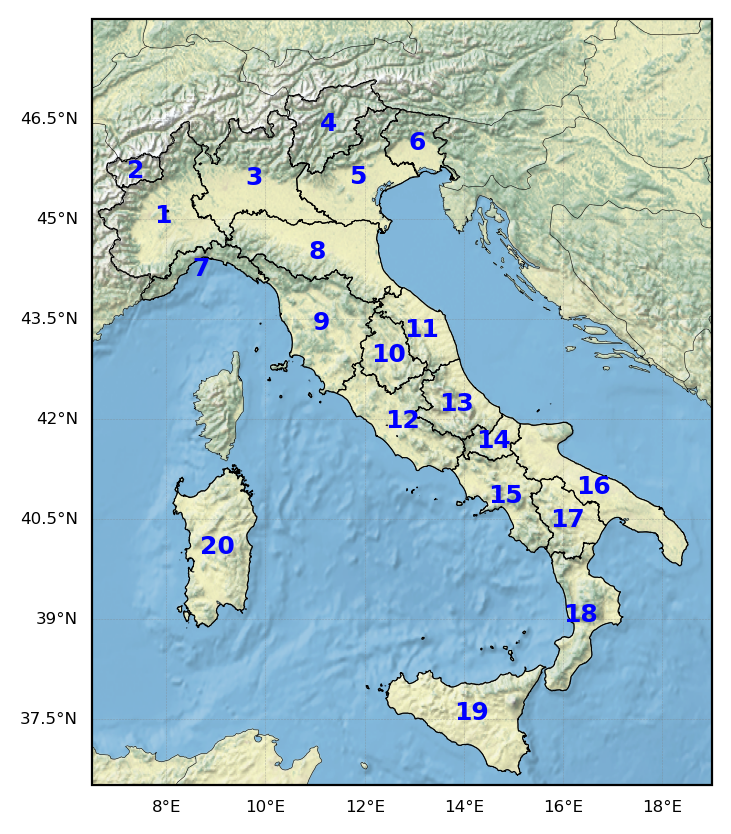

In [10]:
linewidth_map = 0.2

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,5),dpi=200)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_aspect('auto')
ax1.coastlines(linestyle='-',linewidth=linewidth_map,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=linewidth_map,edgecolor='k',zorder=10)

show(naturalearth, ax=ax1)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.4, zorder=10)

handles = []
for idx, row in REGIONS.iterrows():
    # Centroide
    lon_c, lat_c = row['geometry'].centroid.xy
    lon_c = lon_c[0]
    lat_c = lat_c[0]

    # Número en el mapa
    ax1.text(
        lon_c, lat_c, str(idx+1), 
        fontsize=9, color="b", 
        ha='center', va='center', fontweight='bold', zorder=50
    )

    # Guardar correspondencia número ↔ nombre región
    handles.append(mpatches.Patch(color='none', label=f"{idx+1}: {row['REGION']}"))

# ax1.legend(
#     handles=handles,
#     loc='upper right',
#     bbox_to_anchor=(1.25, 1),  # fuera del mapa
#     fontsize=5,
#     ncol=1,
#     frameon=False
# )

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','figure1.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)